# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

●	The main objective of this project is to verify whether there is a typical profile of women who are independent and make or participate in decisions. 

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

. Looking closely at this emancipation, we want to see if  women's ability to work, make decisions, and own bank accounts depends on a specific demographic profile or level of education?

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


●	The data comes from a survey that was done in 2015 by several international agencies including the UN,USAID, MSPP, on morbidity, mortality and service utilization. These data were given to fred by one of his professors at the Technical Center of Planning and Applied Economics.

# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

In [583]:
import pandas as pd
# data processing librairies
import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [584]:
class ReadStataFile:
    def __init__(self,folder_name):
        self.folder_name= folder_name
        self.__load_columns__()

    def __load_columns__(self):
      
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        labels = {}
        for line in lines[2:]:
            if line != "#delimit ;" and len(line.strip()) >0 :
                my_split = line.split('\"')
                my_var = my_split[0].replace("label variable","").strip()
                my_label = my_split[1].strip()
                labels[my_var]=my_label
            
            else:
                break;
        self.variables = labels.keys()
        self.labels = labels.values()
        self.col_dict =labels
        obj.close()
    
    def get_col_modality(self,variable_name):
        # #delimit cr
      
        folder_name = "HTBR71DT"
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        flag_delimiter = 0
        flag_variable_found = 0
        labels ={}
        for line in lines[2:]:
            #print(line)
            if line.lower().strip().find("delimit") >0:
                flag_delimiter = 1
                #print("delimiter found !!!")
            elif line.lower().find(variable_name.lower()) >0 and flag_delimiter == 1:
                flag_variable_found = 1
                #print("variable found !!!")
            elif flag_variable_found == 1 and flag_delimiter == 1 and  line.lower().find(variable_name.lower()) ==-1 and len(line.strip()) >0 and line.strip() != ";" and  len(line.split('\"')) >1   :
                my_split = line.split('\"')    
                my_var_string = my_split[0].strip()
                if self.is_number(my_var_string):
                    my_var = float(my_var_string)
                else:
                    my_var = my_var_string
                my_label = my_split[1].strip()
                labels[my_var]=my_label
                
            
            elif flag_variable_found == 1 and flag_delimiter == 1 and line.strip() == ";" :
                #print("variable not found !!!")
                break;
        obj.close()
        return labels 

    def get_col_label(self,variable_name):
        return self.col_dict.get(variable_name.lower())

    def to_dataframe(self,use_modality=False,columns=None):
        import pandas as pd
        file_name =self.folder_name[0:-2]+"FL"
        df = pd.read_stata(f"./{self.folder_name}/{file_name}.DTA",convert_categoricals=False)
        if columns:
            df=df[columns]
        if  use_modality and not columns:
            for col in self.variables:
                my_dict = self.get_col_modality(col)
                df[col].replace(my_dict,inplace=True)
            
        elif use_modality and  columns :
            for col in columns:
                my_dict = self.get_col_modality(col)
                df[col].replace(my_dict,inplace=True)
        df.rename(columns=self.col_dict,inplace=True)

      

        return df

    def is_number(self,string):
        try:
            float(string)
            return True
        except ValueError:
            return False
    def get_key(self,my_label):
        for key,label in self.col_dict.items():
            if label == my_label:
                return key
                
        return None

In [585]:
fileg = ReadStataFile("HTIR71DT")

In [586]:
cols = pd.read_excel("gogocherie.xlsx", header = None)
gogocherie = cols[0].to_list()

In [587]:
df1 = fileg.to_dataframe(columns=gogocherie, use_modality = True)

In [588]:
df1.to_csv (r'C:\Users\bootcamp\Desktop\Weds\final_data.csv', index = False, header=True) 

In [589]:
df=pd.read_csv("finalg_data.csv")

In [590]:
df.shape

(15513, 30)

In [591]:
df.drop(["Wealth index combined","Literacy","Educational attainment","Owns a house alone or jointly","Owns land alone or jointly","Husband/partner_age","Respondent worked in last 12 months","Husband/partner occupation"],axis=1,inplace=True)

In [592]:
df.drop(["Person who usually decides on respondent health care","Person who usually decides on large household purchases","Person who usually decides on visits to family or relatives"],axis=1,inplace=True)

In [593]:
df.drop(["Husband/partner education level","Husband/partner highest year of education","Highest year of education","Use mobile telephone for financial transactions"],axis=1,inplace=True)

In [594]:
df.dtypes

Case Identification                                             object
Respondent year of birth                                         int64
Respondent current age                                           int64
Age_group                                                       object
Region                                                          object
Type of place of residence                                      object
Highest educational level                                       object
Religion                                                        object
Education in single years                                        int64
Has an account in a bank or other financial institution         object
Total children ever born                                       float64
Current marital status                                          object
Respondent currently working                                    object
Respondent_occupation                                           object
Person

In [595]:
df["Total children ever born"]=df["Total children ever born"].fillna(0)

In [596]:
df['Total children ever born'] = df['Total children ever born'].apply(np.int64)

In [597]:
df.drop_duplicates(inplace=True)


In [598]:
df.shape


(15513, 15)

In [599]:
df.rename(columns={"Has an account in a bank or other financial institution":"Bank_Account","Region":"Departement","Respondent currently working":"currently_working","Current marital status":"marital status","Person who usually decides how to spend respondent earnings":"Spend earnings","Person who usually decides on respondent health care":"Health_care","Person who usually decides on large household purchases":"household purchases","Person who usually decides on visits to family or relatives":"visit family","Person who usually decides what to do with money husband earns":"dispose_money_partner","Type of place of residence":"Residence_place","Total children ever born":"children_number","Respondent current age":"Age"},inplace=True)
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'children_number', 'marital status', 'currently_working',
       'Respondent_occupation', 'Spend earnings'],
      dtype='object')

## Here is my dataset which contains 15513 observations and 16 variables.
### Case Identification: a unique code assigned to each women of the questionnaire to identify them
### Respondent year of birth: date of birth of each women
### Age : Age of the women
### Age_group : Grouped age of women
### Departement: one of territoSubdivision of Haiti
### One of the territorial subdivisions of Haiti
### Residence_place : Region rural or urban
### Highest educational level : education level of the women
### Religion:Religious sect that the women frequent
### Bank_Account: If the women have an account in a bank or in other financial institution
### Children_number: the number of children that have each women
### Marital_status : explain the status of each women
### currently_working: If the women work at the time they answer the questionnaire
### Respondent_occupation: If the women work or not at the time they answer the questionnaire
### Spend_earnings: if the women decide how to spend they money without anyone's approval  
     

## Why do i choose these variables
### I chose these variables because they will help me to carry out my project on women's financial independence. These variables are composed of demographic variables (age, department, residence, marital status) and characteristic variables that define whether a woman is independent or not (including: current work, occupation, bank account).

In [600]:

def missing_percent(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent], axis=1)
        
        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_columns

In [601]:
missing_percent(df)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,Percent of Total Values
Spend earnings,9941,64.08
marital status,1142,7.36
currently_working,1142,7.36
Respondent_occupation,1142,7.36


In [602]:
df["Departement"]= df["Departement"].apply(lambda x: str(x).replace('Rest-Ouest','Ouest'))

In [603]:
df["marital status"]= df["marital status"].apply(lambda x: str(x).replace('Living with partner','cohabitation'))

In [604]:
df["Departement"]= df["Departement"].apply(lambda x: "Ouest" if x=="Aire Metropolitaine" else x)

In [605]:
df["marital status"]= df["marital status"].apply(lambda x: str(x).replace('No longer living together/separated','separated'))
df["marital status"].value_counts()

Married           6328
Never in union    5760
cohabitation      1235
nan               1142
separated          797
Widowed            214
Divorced            37
Name: marital status, dtype: int64

In [606]:
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'children_number', 'marital status', 'currently_working',
       'Respondent_occupation', 'Spend earnings'],
      dtype='object')

In [607]:
df["Case Identification"]

0               1   1  3
1               1   3  3
2               1   3  4
3               1  17  2
4               1  19  2
              ...       
15508         450  92  2
15509         450  92  4
15510         450  93  1
15511         450  93  3
15512         450  93  4
Name: Case Identification, Length: 15513, dtype: object

In [608]:
categorigals_variables=["Age_group","Departement","Residence_place","Highest educational level","Religion","Education in single years","Bank_Account","marital status","currently_working","Respondent_occupation","Spend earnings"]
df_categoricals=df[categorigals_variables]
df_categoricals

,Age_group,Departement,Residence_place,Highest educational level,Religion,Education in single years,Bank_Account,marital status,currently_working,Respondent_occupation,Spend earnings
0,15-19,Sud,Rural,Secondary,Protestant,10,No,Never in union,No,Not working and didnt work in last 12 months,NaN
1,25-29,Sud,Rural,Secondary,Catholic,11,No,Never in union,No,Commercant et assimilé,NaN
2,15-19,Sud,Rural,Primary,Catholic,4,No,Never in union,No,Not working and didnt work in last 12 months,NaN
3,30-34,Sud,Rural,Secondary,Protestant,12,Yes,Married,Yes,Insituteur et assimilés,Respondent and husband/partner
4,25-29,Sud,Rural,Secondary,Protestant,13,No,Married,No,Insituteur et assimilés,Respondent and husband/partner
...,...,...,...,...,...,...,...,...,...,...,...
15508,50+,Ouest,Urban,Primary,Protestant,6,No,nan,NaN,NaN,NaN
15509,25-29,Ouest,Urban,Higher,Protestant,16,No,Never in union,No,Not working and didnt work in last 12 months,NaN
15510,30-34,Ouest,Urban,Higher,Protestant,15,Yes,Never in union,Yes,Employé administratif du secteur privé,NaN
15511,30-34,Ouest,Urban,Higher,Protestant,16,Yes,Never in union,No,Commercant et assimilé,NaN


In [609]:
import statistics
statistics.mode(df_categoricals["Age_group"])

'15-19'

In [610]:
statistics.mode(df_categoricals["Departement"])

'Ouest'

In [611]:
numericals_variables=["Respondent year of birth","Age"]
df_numericals=df[numericals_variables]
df_numericals

,Respondent year of birth,Age
0,1999,18
1,1988,28
2,1999,18
3,1983,33
4,1989,28
...,...,...
15508,1958,58
15509,1990,26
15510,1982,34
15511,1982,34


In [612]:
df_numericals.describe()

,Respondent year of birth,Age
count,15513.000000,15513.000000
mean,1985.581190,30.576871
std,11.994277,11.985988
min,1952.000000,15.000000
25%,1977.000000,20.000000
50%,1988.000000,28.000000
75%,1996.000000,39.000000
max,2002.000000,64.000000


In [613]:
df["currently_working"].value_counts()

No     8171
Yes    6200
Name: currently_working, dtype: int64

In [614]:
df.columns

Index(['Case Identification', 'Respondent year of birth', 'Age', 'Age_group',
       'Departement', 'Residence_place', 'Highest educational level',
       'Religion', 'Education in single years', 'Bank_Account',
       'children_number', 'marital status', 'currently_working',
       'Respondent_occupation', 'Spend earnings'],
      dtype='object')

In [615]:
df["Highest educational level"].value_counts()

Secondary       6946
Primary         4916
No education    2789
Higher           862
Name: Highest educational level, dtype: int64

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

In [616]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15513 entries, 0 to 15512
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Case Identification        15513 non-null  object
 1   Respondent year of birth   15513 non-null  int64 
 2   Age                        15513 non-null  int64 
 3   Age_group                  15513 non-null  object
 4   Departement                15513 non-null  object
 5   Residence_place            15513 non-null  object
 6   Highest educational level  15513 non-null  object
 7   Religion                   15513 non-null  object
 8   Education in single years  15513 non-null  int64 
 9   Bank_Account               15513 non-null  object
 10  children_number            15513 non-null  int64 
 11  marital status             15513 non-null  object
 12  currently_working          14371 non-null  object
 13  Respondent_occupation      14371 non-null  object
 14  Spend 

,Case Identification,Respondent year of birth,Age,Age_group,Departement,Residence_place,Highest educational level,Religion,Education in single years,Bank_Account,children_number,marital status,currently_working,Respondent_occupation,Spend earnings
0,1 1 3,1999,18,15-19,Sud,Rural,Secondary,Protestant,10,No,0,Never in union,No,Not working and didnt work in last 12 months,NaN
1,1 3 3,1988,28,25-29,Sud,Rural,Secondary,Catholic,11,No,0,Never in union,No,Commercant et assimilé,NaN
2,1 3 4,1999,18,15-19,Sud,Rural,Primary,Catholic,4,No,0,Never in union,No,Not working and didnt work in last 12 months,NaN
3,1 17 2,1983,33,30-34,Sud,Rural,Secondary,Protestant,12,Yes,1,Married,Yes,Insituteur et assimilés,Respondent and husband/partner
4,1 19 2,1989,28,25-29,Sud,Rural,Secondary,Protestant,13,No,0,Married,No,Insituteur et assimilés,Respondent and husband/partner


In [617]:
#We define a function that can generate barchart
def generate_barchart(data, title ="",abs_value ="independent",rel_value="independent_percent",figsize =(10,6),horizontal=True,):
  plt.figure(figsize=figsize)
  if horizontal:
      axes = sns.barplot(data=data,x=abs_value,y=data.index)
      i=0
      for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(tot/2,
                  i,
                  str(np.round(perc*100,2))+ "%",
                    fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                  )
        axes.text(tot+3,
                  i,
                  str(tot),
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        
        i+=1
      plt.title(title)
      plt.show()
  else:
        axes = sns.barplot(data=data,y=abs_value,x=data.index)
        i=0
        for tot, perc in zip(data[abs_value],data[rel_value]):
          axes.text(i,
                    tot/2,
                    str(np.round(perc*100,2))+ "%",
                      fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                    )
          axes.text(i,
                    tot+3,
                    str(tot),
                      fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                    )
          
          i+=1
        plt.title(title)
        plt.show()

In [618]:

#This fucntion will show the plot and will show the probability
def graph(data,top_n =6, abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=True):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize,horizontal=horizontal)
     return result

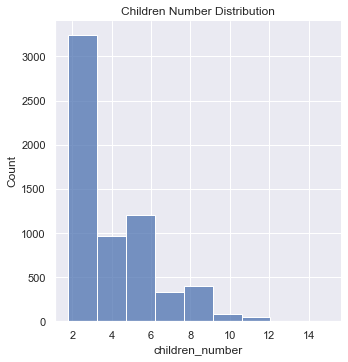

In [619]:
import seaborn as sns
import matplotlib.pyplot as plt
bins = np.linspace(df.children_number.mean(),df.children_number.max(),10)
sns.set(style="darkgrid")
order=df.children_number.sort_values()
sns.displot(data=order, bins=bins )
plt.title("Children Number Distribution")
plt.show()

In [620]:
Age_count=df_categoricals["Age_group"].value_counts().to_frame()
Age_count

,Age_group
15-19,3307
20-24,2773
25-29,2202
30-34,1919
35-39,1645
40-44,1308
45-49,1217
50+,1142


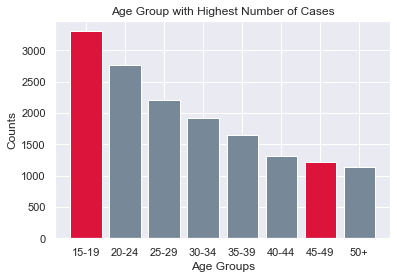

In [621]:
#data prep
dm=df_categoricals["Age_group"].value_counts()
dq=pd.DataFrame({'Age_group':dm.index, 'Counts':dm.values})
#color change
colors = ['lightslategray'] * 6
colors[0] = 'crimson'
plt.bar(dq.Age_group, dq.Counts, color=colors)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title('Age Group with Highest Number of Cases')
plt.show()
#Bar width change
# plt.rcParams["figure.figsize"] = (10, 5)
# plt.bar(dq.Age_group, dq.Counts, color="orange", width=[1.2,0.7,0.5,0.4,0.2,0.1])
# plt.xlabel("Age Groups")
# plt.ylabel("Counts")
# plt.title('Age Group with Highest Number of Cases')
# plt.show()

In [622]:
marital_count=df_categoricals["marital status"].value_counts().to_frame()
marital_count


,marital status
Married,6328
Never in union,5760
cohabitation,1235
nan,1142
separated,797
Widowed,214
Divorced,37


In [623]:
Residence_count=df_categoricals["Residence_place"].value_counts().to_frame()
Residence_count


,Residence_place
Rural,9426
Urban,6087


In [624]:
education_count=df_categoricals["Highest educational level"].value_counts().to_frame()
education_count

,Highest educational level
Secondary,6946
Primary,4916
No education,2789
Higher,862


In [625]:
department_count=df_categoricals["Departement"].value_counts().to_frame()
department_count

,Departement
Ouest,3692
Artibonite,1896
Nord-Ouest,1561
Nord,1553
Sud,1283
Centre,1212
Nord-Est,1178
Sud-Est,1141
Grand'Anse,1028
Nippes,969


Text(0.5, 1.0, 'Distribution of the data by Departement')

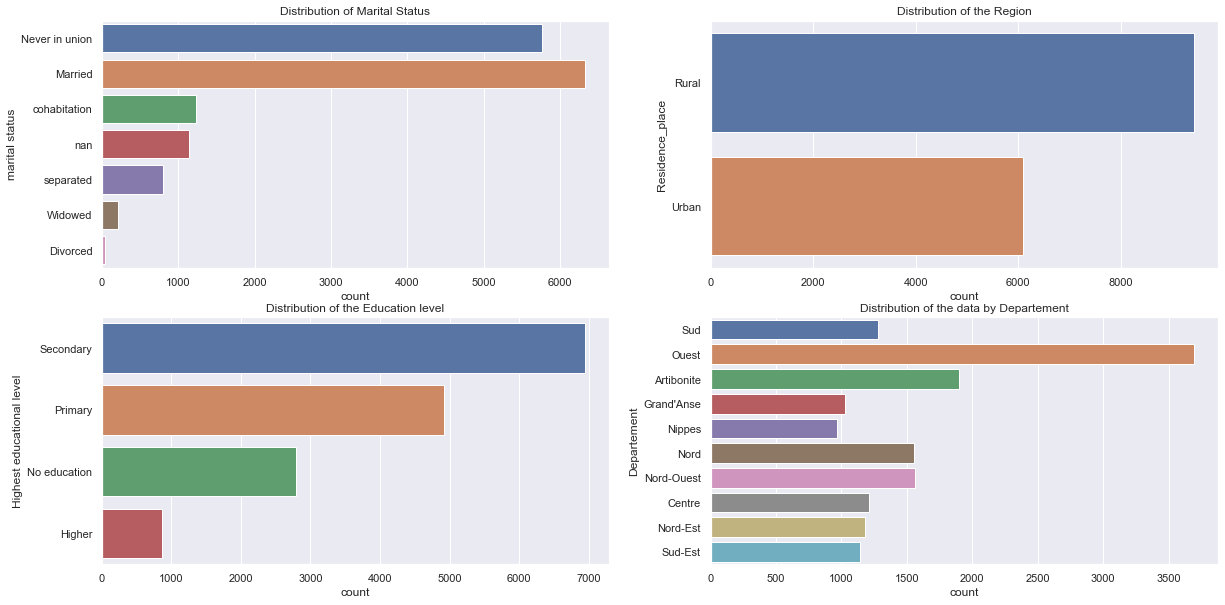

In [626]:
fig,axes=plt.subplots(2,2, figsize=(20,10))
sns.countplot(data=df,y='marital status',ax=axes[0,0])
axes[0,0].set_title('Distribution of Marital Status')
sns.countplot(data=df,y='Residence_place',ax=axes[0,1])
axes[0,1].set_title('Distribution of the Region')

sns.countplot(data=df,y='Highest educational level',ax=axes[1,0])
axes[1,0].set_title('Distribution of the Education level')

sns.countplot(data=df,y='Departement',ax=axes[1,1])
axes[1,1].set_title('Distribution of the data by Departement')



In [627]:
# bank_counts= df_categoricals["Bank_Account"].value_counts().to_frame()
# bank_counts
# total = len(df['Bank_Account'])*1.
# total
# percentage = '{:.1f}%'.format(100 * p.get_width()/total)

# percentage



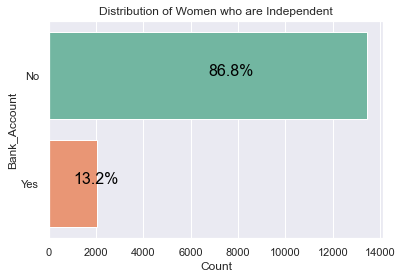

In [628]:
# countplt, ax = plt.subplots(figsize = (5,5))
# ax=sns.countplot(x ='Bank_Account', data = df_categoricals, palette = "Set2")
total = len(df['Bank_Account'])*1.
ax = sns.countplot(y="Bank_Account", data=df,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")


In [629]:
occupation_count=df_categoricals["Respondent_occupation"].value_counts().to_frame()
b = occupation_count.iloc[:5,:]
occupation_count

,Respondent_occupation
Not working and didn't work in last 12 months,6113
Commercant et assimilé,5681
Agriculteur,736
Personnel des services directs au particulier,569
Insituteur et assimilés,325
Not working and didnt work in last 12 months,249
Ouvrier qualifié de type artisanal,168
Profession intermediare de la sante et du travail social,101
Ouvrier qualifié de type industriel,80
Employé administratif du secteur privé,79


In [630]:
bb = b.reset_index()
bb

,index,Respondent_occupation
0,Not working and didn't work in last 12 months,6113
1,Commercant et assimilé,5681
2,Agriculteur,736
3,Personnel des services directs au particulier,569
4,Insituteur et assimilés,325


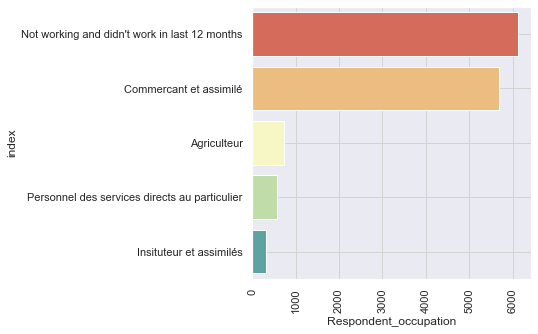

In [631]:
df_c = df.iloc[:, 1:].eq(1).sum().rename_axis('Feature').reset_index(name='Cou‌nt')
df_c = df_c.sort_values('Cou‌nt')
plt.figure(figsize=(5,5))
ax = sns.barplot(x="Respondent_occupation", y="index", data=bb, palette=sns.color_palette("Spectral", 5))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [632]:
Bank =df["Bank_Account"].value_counts(normalize=False).to_frame()
Bank.rename(columns={"Bank_Acount":"Bank_Total"}, inplace=True)
Bank_percent=df["Bank_Account"].value_counts(normalize=True).to_frame()
Bank_percent.rename(columns={"Bank_Account":"Bank_Percent"},inplace=True)
Bank_f= pd.concat([Bank,Bank_percent], axis=1)
Bank_f


,Bank_Account,Bank_Percent
No,13460,0.867659
Yes,2053,0.132341


In [633]:
#graphe=generate_barchart(data=Bank_f,title="Women who have a bank account or no",abs_value="Bank_Account",rel_value="Bank_Percent")

In [634]:
# sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)


## Multivariate Analysis

In [721]:
def Bank(x):
    pivo=pd.pivot_table(df, values='Case Identification', index=[x], columns="Bank_Account",aggfunc='count')
    pivo.rename(columns={"Yes":"Have an Account","No":"Dont have Account"}, inplace=True)
    pivo.fillna(0)
    pivo1=pd.pivot_table(df, values='Case Identification', index=[x], columns="Respondent_occupation",aggfunc='count')
    pivo1.fillna(0)

    pivo2=pd.pivot_table(df, values='Case Identification', index=[x], columns="currently_working",aggfunc='count')
    pivo2.rename(columns={"Yes":"Working","No":"dont working"},inplace=True)
    pivo2.fillna(0)
    pivo3=pd.pivot_table(df, values='Case Identification', index=[x], columns="Spend earnings",aggfunc='count')
    pivo3.fillna(0)
    return pivo, pivo1, pivo2, pivo3


<AxesSubplot:xlabel='Residence_place'>

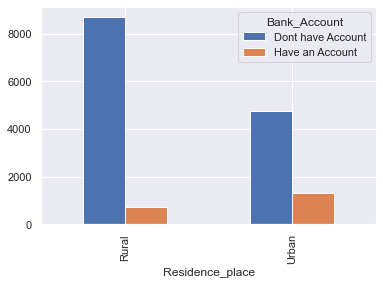

In [636]:
Bank_Residence,work_residence,spend_residence,Respondent_residence = Bank("Residence_place")
Bank_Residence.plot(kind="bar")

In [722]:
def stackbar(data=df):
    ax = df.plot(kind='bar', stacked=True, rot=0)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    # add annotations if desired
    for c in ax.containers:
        
        # set the bar label
        ax.bar_label(c, label_type='center')

In [638]:
work_residence

Respondent_occupation,Agriculteur,Artisan,Cadre de la fonction publique,Cadres adminsitratifs ou commercial d'entreperise,Chaffeur,Chef d'entreprise,"Clerge, regligieux",Commercant et assimilé,"Contremaitre, agent de maitrise",Employé administratif du secteur privé,...,Ouvrier qualifié de type artisanal,Ouvrier qualifié de type industriel,Personnel des services directs au particulier,Policier ou militaire,"Professeur, Profession Scientifque",Profession de l'information des arts et spectacles,Profession intermediare de la sante et du travail social,Profession intermediare/administrative du privé,Profession libérale,Technicien (sauf technicien du tertiaire)
Residence_place,,,,,,,,,,,,,,,,,,,,,
Rural,703.0,16.0,5.0,6.0,1.0,1.0,3.0,3559.0,4.0,22.0,...,81.0,16.0,217.0,NaN,5.0,8.0,40.0,8.0,1.0,1.0
Urban,33.0,4.0,13.0,18.0,3.0,4.0,1.0,2122.0,1.0,57.0,...,87.0,64.0,352.0,3.0,14.0,18.0,61.0,38.0,4.0,15.0


In [639]:
spend_residence

currently_working,dont working,Working
Residence_place,,
Rural,4874,3742
Urban,3297,2458


In [640]:
Bank_status,Respondent_status,work_status,spend_status=Bank("marital status")
Bank_status

Bank_Account,Dont have Account,Have an Account
marital status,,
Divorced,31,6
Married,5277,1051
Never in union,5242,518
Widowed,182,32
cohabitation,1030,205
nan,1039,103
separated,659,138


<AxesSubplot:xlabel='Residence_place'>

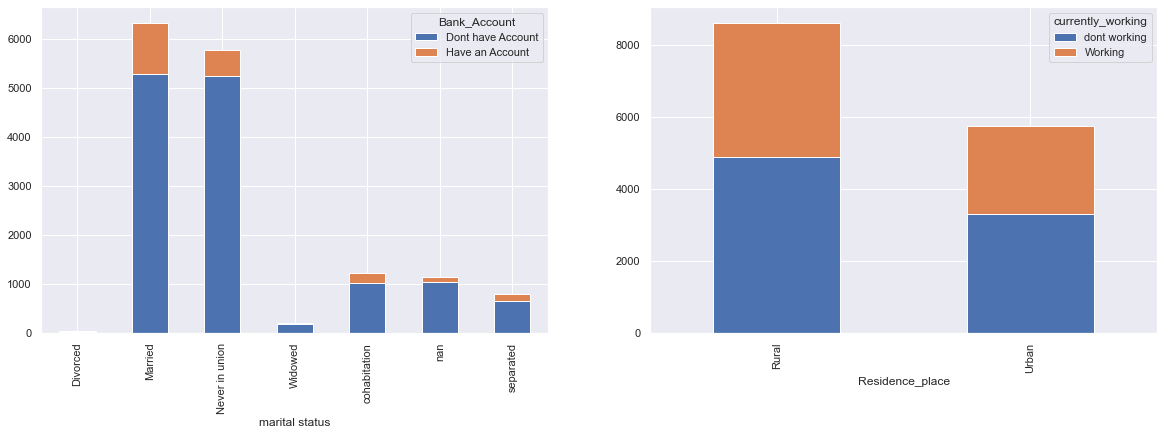

In [641]:
fig,axes=plt.subplots(ncols=2, figsize=(20,6))
Bank_status.plot(kind="bar", stacked=True, ax=axes[0])
spend_residence.plot(kind="bar", stacked=True, ax=axes[1])

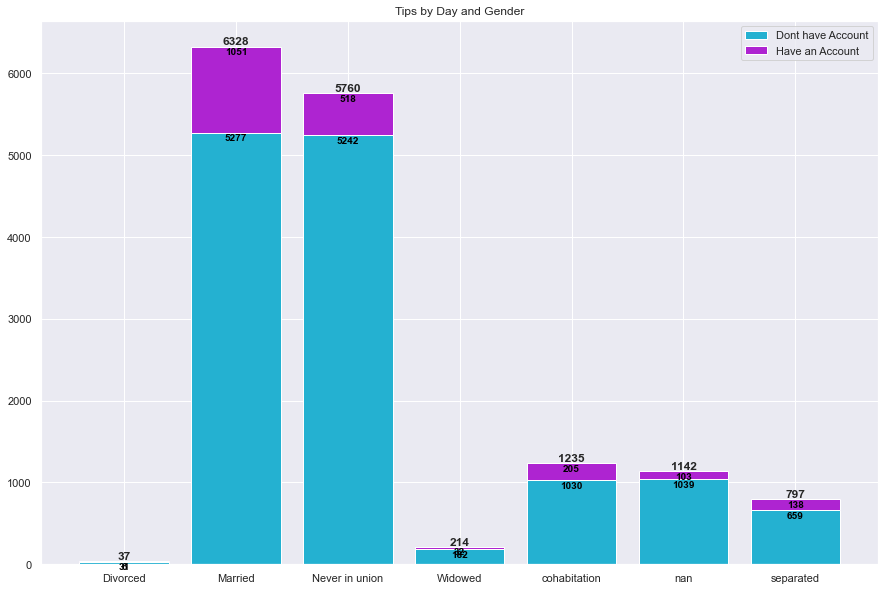

In [642]:

# # df1 = df['Column']
# # ax = df1.plot(kind='bar',stacked=True)
# # for rec, label in zip(ax.patches,d['Dont have Account'].round(1).astype(str)):
# #     height = rec.get_height()
# #     ax.text(rec.get_x() + rec.get_width() / 2, height + .05, label,
# #            ha = 'center', va='bottom')
# # plt.legend(loc='lower right')
# fig, ax = plt.subplots(figsize=(15,10))

# colors = ['#24b1d1', '#ae24d1']
# bottom = np.zeros(len(Bank_status))

# for i, col in enumerate(Bank_status.columns):
#   ax.bar(
#       Bank_status.index, Bank_status[col], bottom=bottom, label=col, color=colors[i])
#   bottom += np.array(Bank_status[col])

# totals = Bank_status.sum(axis=1)
# y_offset = 20
# for i, total in enumerate(totals):
#   ax.text(totals.index[i], total + y_offset, round(total), ha='center',
#           weight='bold')

# # Let's put the annotations inside the bars themselves by using a
# # negative offset.
# y_offset = -100
# # For each patch (basically each rectangle within the bar), add a label.
# for bar in ax.patches:
#   ax.text(
#       # Put the text in the middle of each bar. get_x returns the start
#       # so we add half the width to get to the middle.
#       bar.get_x() + bar.get_width() / 2,
#       # Vertically, add the height of the bar to the start of the bar,
#       # along with the offset.
#       bar.get_height() + bar.get_y() + y_offset,
#       # This is actual value we'll show.
#       round(bar.get_height()),
#       # Center the labels and style them a bit.
#       ha='center',
#       color='black',
#       weight='bold',
#       size=10
#   )

# ax.set_title('Person Who Dont have Account')
# ax.legend()

In [643]:
# # load dataset
# tips = sns.load_dataset("tips")

# # set plot style: grey grid in the background:
# sns.set(style="darkgrid")

# # set the figure size
# plt.figure(figsize=(14, 14))

# # top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
# # total = tips.groupby('day')['total_bill'].sum().reset_index()

# # bar chart 1 -> top bars (group of 'smoker=No')
# bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# # bottom bar ->  take only smoker=Yes values from the data
# smoker = tips[tips.smoker=='Yes']

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# # add legend
# top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# plt.show()

In [644]:
work_status

currently_working,dont working,Working
marital status,,
Divorced,17,20
Married,2475,3853
Never in union,4687,1073
Widowed,68,146
cohabitation,604,631
separated,320,477


In [645]:
Respondent_status

Respondent_occupation,Agriculteur,Artisan,Cadre de la fonction publique,Cadres adminsitratifs ou commercial d'entreperise,Chaffeur,Chef d'entreprise,"Clerge, regligieux",Commercant et assimilé,"Contremaitre, agent de maitrise",Employé administratif du secteur privé,...,Ouvrier qualifié de type artisanal,Ouvrier qualifié de type industriel,Personnel des services directs au particulier,Policier ou militaire,"Professeur, Profession Scientifque",Profession de l'information des arts et spectacles,Profession intermediare de la sante et du travail social,Profession intermediare/administrative du privé,Profession libérale,Technicien (sauf technicien du tertiaire)
marital status,,,,,,,,,,,,,,,,,,,,,
Divorced,NaN,1.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Married,532.0,10.0,3.0,14.0,2.0,4.0,2.0,3601.0,2.0,32.0,...,91.0,42.0,185.0,3.0,9.0,4.0,48.0,15.0,2.0,5.0
Never in union,80.0,6.0,12.0,6.0,2.0,1.0,NaN,915.0,2.0,34.0,...,43.0,20.0,211.0,NaN,7.0,21.0,38.0,22.0,3.0,7.0
Widowed,28.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0,NaN,NaN,...,3.0,NaN,16.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0
cohabitation,46.0,2.0,1.0,3.0,NaN,NaN,1.0,602.0,1.0,11.0,...,20.0,10.0,81.0,NaN,NaN,1.0,8.0,6.0,NaN,2.0
separated,50.0,1.0,2.0,1.0,NaN,NaN,1.0,421.0,NaN,2.0,...,11.0,8.0,76.0,NaN,1.0,NaN,6.0,2.0,NaN,1.0


In [646]:
spend_status

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else
marital status,,,,
Married,150.0,1759.0,2835.0,NaN
cohabitation,24.0,634.0,168.0,2.0


In [647]:
Bank_education,Respondent_education,work_education,spend_education= Bank("Highest educational level")
Bank_education

Bank_Account,Dont have Account,Have an Account
Highest educational level,,
Higher,347,515
No education,2698,91
Primary,4613,303
Secondary,5802,1144


In [648]:
Respondent_education

Respondent_occupation,Agriculteur,Artisan,Cadre de la fonction publique,Cadres adminsitratifs ou commercial d'entreperise,Chaffeur,Chef d'entreprise,"Clerge, regligieux",Commercant et assimilé,"Contremaitre, agent de maitrise",Employé administratif du secteur privé,...,Ouvrier qualifié de type artisanal,Ouvrier qualifié de type industriel,Personnel des services directs au particulier,Policier ou militaire,"Professeur, Profession Scientifque",Profession de l'information des arts et spectacles,Profession intermediare de la sante et du travail social,Profession intermediare/administrative du privé,Profession libérale,Technicien (sauf technicien du tertiaire)
Highest educational level,,,,,,,,,,,,,,,,,,,,,
Higher,3.0,NaN,9.0,11.0,1.0,1.0,NaN,126.0,1.0,56.0,...,1.0,8.0,30.0,2.0,11.0,10.0,68.0,25.0,4.0,8.0
No education,341.0,3.0,NaN,NaN,1.0,NaN,1.0,1100.0,NaN,NaN,...,9.0,3.0,71.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Primary,301.0,13.0,NaN,3.0,NaN,NaN,2.0,2230.0,3.0,NaN,...,42.0,15.0,197.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0
Secondary,91.0,4.0,9.0,10.0,2.0,4.0,1.0,2225.0,1.0,23.0,...,116.0,54.0,271.0,1.0,8.0,15.0,28.0,21.0,1.0,7.0


In [649]:
work_education

currently_working,dont working,Working
Highest educational level,,
Higher,438,415
No education,756,1267
Primary,2476,2158
Secondary,4501,2360


In [650]:
spend_education

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else
Highest educational level,,,,
Higher,5.0,88.0,135.0,NaN
No education,51.0,539.0,679.0,NaN
Primary,67.0,885.0,1188.0,NaN
Secondary,51.0,881.0,1001.0,2.0


In [651]:
Bank_religion,Respondent_religion,work_religion,spend_religion= Bank("Religion")
Bank_religion

Bank_Account,Dont have Account,Have an Account
Religion,,
Catholic,5245.0,764.0
No religion,926.0,66.0
Other,NaN,1.0
Protestant,7120.0,1212.0
Vaudousant,169.0,10.0


In [652]:
Respondent_religion

Respondent_occupation,Agriculteur,Artisan,Cadre de la fonction publique,Cadres adminsitratifs ou commercial d'entreperise,Chaffeur,Chef d'entreprise,"Clerge, regligieux",Commercant et assimilé,"Contremaitre, agent de maitrise",Employé administratif du secteur privé,...,Ouvrier qualifié de type artisanal,Ouvrier qualifié de type industriel,Personnel des services directs au particulier,Policier ou militaire,"Professeur, Profession Scientifque",Profession de l'information des arts et spectacles,Profession intermediare de la sante et du travail social,Profession intermediare/administrative du privé,Profession libérale,Technicien (sauf technicien du tertiaire)
Religion,,,,,,,,,,,,,,,,,,,,,
Catholic,336.0,2.0,5.0,5.0,NaN,3.0,2.0,2371.0,1.0,26.0,...,48.0,25.0,234.0,2.0,5.0,9.0,27.0,12.0,1.0,5.0
No religion,51.0,3.0,1.0,2.0,NaN,NaN,NaN,357.0,NaN,NaN,...,8.0,6.0,35.0,NaN,NaN,1.0,3.0,3.0,NaN,NaN
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protestant,334.0,15.0,12.0,17.0,4.0,2.0,NaN,2866.0,4.0,53.0,...,111.0,49.0,296.0,1.0,14.0,16.0,70.0,31.0,4.0,11.0
Vaudousant,15.0,NaN,NaN,NaN,NaN,NaN,2.0,87.0,NaN,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [653]:
work_religion

currently_working,dont working,Working
Religion,,
Catholic,2958.0,2541.0
No religion,603.0,353.0
Other,1.0,NaN
Protestant,4549.0,3213.0
Vaudousant,60.0,93.0


In [654]:
spend_religion

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else
Religion,,,,
Catholic,68.0,1032.0,1257.0,1.0
No religion,15.0,197.0,145.0,NaN
Protestant,87.0,1106.0,1570.0,1.0
Vaudousant,4.0,58.0,31.0,NaN


In [655]:
Bank_age,Respondent_age,work_age,spend_age= Bank("Age_group")
Bank_age

Bank_Account,Dont have Account,Have an Account
Age_group,,
15-19,3272,35
20-24,2506,267
25-29,1788,414
30-34,1461,458
35-39,1296,349
40-44,1056,252
45-49,1042,175
50+,1039,103


In [656]:
Respondent_age

Respondent_occupation,Agriculteur,Artisan,Cadre de la fonction publique,Cadres adminsitratifs ou commercial d'entreperise,Chaffeur,Chef d'entreprise,"Clerge, regligieux",Commercant et assimilé,"Contremaitre, agent de maitrise",Employé administratif du secteur privé,...,Ouvrier qualifié de type artisanal,Ouvrier qualifié de type industriel,Personnel des services directs au particulier,Policier ou militaire,"Professeur, Profession Scientifque",Profession de l'information des arts et spectacles,Profession intermediare de la sante et du travail social,Profession intermediare/administrative du privé,Profession libérale,Technicien (sauf technicien du tertiaire)
Age_group,,,,,,,,,,,,,,,,,,,,,
15-19,44.0,4.0,1.0,1.0,NaN,NaN,NaN,370.0,2.0,1.0,...,9.0,NaN,71.0,NaN,NaN,8.0,3.0,2.0,NaN,3.0
20-24,82.0,2.0,6.0,2.0,2.0,NaN,NaN,770.0,NaN,9.0,...,26.0,15.0,124.0,NaN,NaN,7.0,7.0,9.0,NaN,NaN
25-29,88.0,3.0,7.0,5.0,1.0,NaN,NaN,978.0,1.0,23.0,...,28.0,22.0,118.0,1.0,2.0,6.0,27.0,19.0,1.0,2.0
30-34,94.0,1.0,1.0,6.0,1.0,2.0,NaN,1041.0,NaN,24.0,...,39.0,17.0,83.0,NaN,5.0,2.0,25.0,7.0,3.0,3.0
35-39,125.0,4.0,NaN,3.0,NaN,1.0,1.0,967.0,NaN,15.0,...,35.0,14.0,72.0,1.0,7.0,1.0,16.0,5.0,1.0,3.0
40-44,130.0,2.0,2.0,5.0,NaN,2.0,2.0,825.0,NaN,3.0,...,20.0,9.0,55.0,NaN,3.0,2.0,12.0,3.0,NaN,3.0
45-49,173.0,4.0,1.0,2.0,NaN,NaN,1.0,730.0,2.0,4.0,...,11.0,3.0,46.0,1.0,2.0,NaN,11.0,1.0,NaN,2.0


In [657]:
work_age

currently_working,dont working,Working
Age_group,,
15-19,3030,277
20-24,2012,761
25-29,1093,1109
30-34,772,1147
35-39,546,1099
40-44,375,933
45-49,343,874


In [658]:
spend_age

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else
Age_group,,,,
15-19,4.0,41.0,39.0,1.0
20-24,29.0,286.0,282.0,NaN
25-29,33.0,426.0,524.0,NaN
30-34,23.0,482.0,619.0,1.0
35-39,26.0,476.0,590.0,NaN
40-44,31.0,370.0,519.0,NaN
45-49,28.0,312.0,430.0,NaN


In [659]:
Bank_departement,Respondent_departement,work_departement,spend_departement= Bank("Departement")
Bank_departement

Bank_Account,Dont have Account,Have an Account
Departement,,
Artibonite,1694,202
Centre,1073,139
Grand'Anse,943,85
Nippes,872,97
Nord,1318,235
Nord-Est,1054,124
Nord-Ouest,1371,190
Ouest,3024,668
Sud,1110,173


In [720]:
Respondent_departement.fillna(0)

Respondent_occupation,Agriculteur,Artisan,Cadre de la fonction publique,Cadres adminsitratifs ou commercial d'entreperise,Chaffeur,Chef d'entreprise,"Clerge, regligieux",Commercant et assimilé,"Contremaitre, agent de maitrise",Employé administratif du secteur privé,...,Ouvrier qualifié de type artisanal,Ouvrier qualifié de type industriel,Personnel des services directs au particulier,Policier ou militaire,"Professeur, Profession Scientifque",Profession de l'information des arts et spectacles,Profession intermediare de la sante et du travail social,Profession intermediare/administrative du privé,Profession libérale,Technicien (sauf technicien du tertiaire)
Departement,,,,,,,,,,,,,,,,,,,,,
Artibonite,114.0,6.0,3.0,1.0,0.0,0.0,1.0,767.0,0.0,2.0,...,13.0,1.0,45.0,0.0,3.0,1.0,7.0,5.0,0.0,1.0
Centre,87.0,2.0,2.0,1.0,1.0,0.0,0.0,452.0,0.0,4.0,...,10.0,2.0,42.0,0.0,1.0,1.0,9.0,1.0,0.0,0.0
Grand'Anse,62.0,0.0,0.0,3.0,0.0,0.0,1.0,405.0,0.0,4.0,...,0.0,0.0,20.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0
Nippes,45.0,3.0,1.0,1.0,0.0,0.0,1.0,373.0,0.0,1.0,...,5.0,2.0,28.0,0.0,0.0,1.0,6.0,1.0,0.0,0.0
Nord,47.0,0.0,1.0,4.0,0.0,1.0,0.0,554.0,0.0,8.0,...,20.0,1.0,52.0,0.0,2.0,2.0,9.0,3.0,1.0,2.0
Nord-Est,63.0,0.0,0.0,6.0,0.0,1.0,0.0,390.0,0.0,3.0,...,26.0,26.0,42.0,0.0,2.0,0.0,4.0,1.0,1.0,1.0
Nord-Ouest,83.0,2.0,0.0,1.0,0.0,0.0,0.0,589.0,2.0,3.0,...,19.0,2.0,34.0,0.0,3.0,4.0,13.0,4.0,0.0,0.0
Ouest,105.0,2.0,7.0,5.0,3.0,3.0,0.0,1317.0,2.0,41.0,...,46.0,42.0,228.0,2.0,4.0,9.0,30.0,27.0,3.0,12.0
Sud,50.0,2.0,2.0,2.0,0.0,0.0,1.0,436.0,1.0,7.0,...,12.0,2.0,46.0,0.0,4.0,2.0,14.0,2.0,0.0,0.0


In [661]:
work_departement

currently_working,dont working,Working
Departement,,
Artibonite,966,782
Centre,661,467
Grand'Anse,548,393
Nippes,505,378
Nord,865,579
Nord-Est,632,464
Nord-Ouest,834,613
Ouest,1903,1582
Sud,689,483


In [662]:
spend_departement

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else
Departement,,,,
Artibonite,16.0,336.0,354.0,NaN
Centre,21.0,180.0,261.0,NaN
Grand'Anse,13.0,125.0,260.0,NaN
Nippes,6.0,146.0,216.0,1.0
Nord,17.0,252.0,242.0,NaN
Nord-Est,12.0,166.0,259.0,1.0
Nord-Ouest,16.0,231.0,344.0,NaN
Ouest,42.0,645.0,595.0,NaN
Sud,16.0,152.0,254.0,NaN


In [663]:
Bank_children,Respondent_children,work_children,spend_children= Bank("children_number")
Bank_children

Bank_Account,Dont have Account,Have an Account
children_number,,
0,6191.0,715.0
1,1839.0,472.0
2,1516.0,379.0
3,1126.0,222.0
4,847.0,118.0
5,647.0,76.0
6,454.0,30.0
7,308.0,20.0
8,244.0,10.0


In [664]:
work_children

currently_working,dont working,Working
children_number,,
0,4628.0,1136.0
1,1224.0,1087.0
2,806.0,1089.0
3,527.0,821.0
4,328.0,637.0
5,229.0,494.0
6,158.0,326.0
7,110.0,218.0
8,75.0,179.0


In [665]:
spend_children

Spend earnings,Husband/partner alone,Respondent alone,Respondent and husband/partner,Someone else
children_number,,,,
0,12.0,137.0,173.0,1.0
1,34.0,533.0,487.0,NaN
2,36.0,520.0,589.0,1.0
3,21.0,387.0,454.0,NaN
4,23.0,253.0,405.0,NaN
5,14.0,181.0,298.0,NaN
6,15.0,151.0,186.0,NaN
7,7.0,90.0,137.0,NaN
8,8.0,71.0,114.0,NaN


In [666]:
group= df.groupby(["currently_working","Spend earnings"])["Case Identification"].count().to_frame()
group

Case Identification
currently_working Spend earnings                                     
No                Husband/partner alone                            34
                  Respondent alone                                502
                  Respondent and husband/partner                  581
Yes               Husband/partner alone                           140
                  Respondent alone                               1891
                  Respondent and husband/partner                 2422
                  Someone else                                      2

In [667]:
group1= df.groupby(["currently_working","Respondent_occupation","Spend earnings"])["Case Identification"].count().to_frame()
group1

Case Identification
currently_working Respondent_occupation                           Spend earnings                                     
No                Agriculteur                                     Husband/partner alone                             3
                                                                  Respondent alone                                 24
                                                                  Respondent and husband/partner                   44
                  Artisan                                         Respondent alone                                  1
                                                                  Respondent and husband/partner                    1
...                                                                                                               ...
Yes               Profession intermediare/administrative du privé Respondent and husband/partner                    8
                  Profession libérale                             Respondent alone                                  1
                                                                  Respondent and husband/partner                    1
                  Technicien (sauf technicien du tertiaire)       Respondent alone                                  4
                                                                  Respondent and husband/partner                    2

[89 rows x 1 columns]

In [668]:
#df["Residence_place"]= df["Residence_place"].apply(lambda x: str(x).replace('Aire Metropolitaine','Ouest'))

In [669]:
#categories_to_test = ['age','gender','merchant','category']
crosstab = pd.crosstab(df["Bank_Account"], df["currently_working"])
crosstab1 = pd.crosstab(df["Bank_Account"], df["Respondent_occupation"])

In [670]:
crosstab

currently_working,No,Yes
Bank_Account,,
No,7455,4966
Yes,716,1234


In [671]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    

stat=372.107, p=0.000
Probably dependent


In [672]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=1744.395, p=0.000
Probably dependent


## MODELLING


In [673]:
df["Respondent_occupation"] = df["Respondent_occupation"].apply(lambda x: 0 if x=="Not working and didn't work in last 12 months" else 1)

In [674]:
df["Bank_Account"] = df["Bank_Account"].apply(lambda x: 0 if x=="No" else 1)

In [675]:
df["Spend earnings"]=df["Spend earnings"].map({"Respondent alone":2,"Respondent and husband/partner":1,"Husband/partner alone":0,"Someone else":0, np.nan:0})
df['currently_working'] = df['currently_working'].apply(lambda x: 1 if x=="Yes" else 0)

In [676]:
""""df['target'] =np.nan
filter1 = df[df['currently_working']==1 and df["Spend earnings"]==1 and df["Respondent occupation"]==1]
filter1
# filter2 = df[df['Spend earnings']=="Respondent alone"]
# filter3 =  df[df["Respondent_occupation"]=="Yes"]
# filter4 =  df[df["currently_working"]=="No"]
# filter5 =  df[df["Spend earnings"]=="No"]
# filter6 =  df[df["Respondent_occupation"]]""" 
df["Spend earnings"].unique()

array([0, 1, 2], dtype=int64)

In [677]:
df["Score"] = 0.2*df["Respondent_occupation"]+0.3*df["Spend earnings"]+0.4*df["currently_working"]+0.1*df["Bank_Account"]
df["score1"] = (df["Score"]-df["Score"].min())/(df["Score"].max()-df["Score"].min())
df["Financial_Independance"] = df["score1"].apply(lambda x: 1 if x>=0.6 else 0)


In [678]:
df.Financial_Independance.value_counts().to_frame()


,Financial_Independance
0,10698
1,4815


In [679]:
df["score1"]

0        0.153846
1        0.153846
2        0.153846
3        0.769231
4        0.384615
           ...   
15508    0.153846
15509    0.153846
15510    0.538462
15511    0.230769
15512    0.538462
Name: score1, Length: 15513, dtype: float64

In [680]:
"""df = (df.replace(['TOH','n','Out','out','OUT','no'], 'No')
        .replace(['TIH','m','A','IN'], 'Yes')
        .replace(['M','F'], ['Male', 'Female']))"""

"df = (df.replace(['TOH','n','Out','out','OUT','no'], 'No')\n        .replace(['TIH','m','A','IN'], 'Yes')\n        .replace(['M','F'], ['Male', 'Female']))"

In [681]:
df["Respondent_occupation"]= df["Respondent_occupation"].apply(lambda x: str(x).replace("Not working and didn't work in last 12 months",'0'))

In [682]:
df1=df[df["Financial_Independance"]==1]
df1.Age.fillna(df1.Age.mean())

age1=df1.Age.mean()
age1
df2=df[df["Financial_Independance"]==0]
age2=df2.Age.mean()
age2

from scipy.stats import ttest_ind
ttest_ind(age1,age2)

C:\Users\bootcamp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\bootcamp\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [683]:
children1=df1.children_number.mean()
children2=df2.children_number.mean()

ttest_ind(children1,children2)

Ttest_indResult(statistic=nan, pvalue=nan)

In [684]:
(sns.color_palette("YlOrRd", 10))

[(1.0, 0.9490657439446367, 0.6754940407535563),
 (0.9982622068435217, 0.8946559015763168, 0.5544636678200692),
 (0.996078431372549, 0.8257900807381776, 0.4356170703575548),
 (0.996078431372549, 0.710634371395617, 0.31160322952710495),
 (0.9935717031910803, 0.6052902729719338, 0.25793156478277585),
 (0.9907420222991158, 0.46380622837370244, 0.20982698961937715),
 (0.980161476355248, 0.2890888119953864, 0.1601845444059977),
 (0.9063437139561706, 0.13554786620530565, 0.11884659746251441),
 (0.8072126105344098, 0.045182622068435215, 0.1316416762783545),
 (0.6745713187235679, 0.0, 0.14901960784313725)]

In [685]:
def independence(y):
    pivot=pd.pivot_table(df1, values='Case Identification', index=[y], columns="Financial_Independance",aggfunc='count')
    pivot=pivot.fillna(0)
    pivot.rename(columns={1:"independent"},inplace=True)
    return pivot

def independence_group(ab):
    ac = ab/df1.shape[0]
    ac.rename(columns={"independent":"independent_percent"},inplace=True)
    ad= pd.concat([ab,ac], axis=1)

    ad["independent"]=ad["independent"].sort_values(ascending=False).to_list()
    ad.reset_index(level=0, inplace=True)
    return ad

,Financial_Independance
0,0.689615
1,0.310385


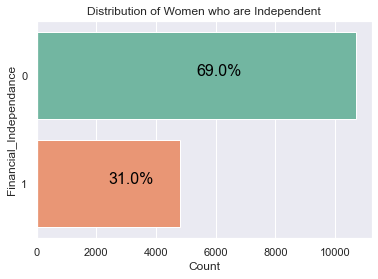

In [686]:
financial = df.Financial_Independance.value_counts(normalize=True).to_frame()
display(financial)
total = len(df['Financial_Independance'])*1.
ax = sns.countplot(y="Financial_Independance", data=df,palette = "Set2")
plt.title('Distribution of Women who are Independent')
plt.xlabel('Count')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

Financial_Independance,Age_group,independent,independent_percent
0,15-19,981,0.004254
1,20-24,961,0.031457
2,25-29,837,0.053955
3,30-34,799,0.063237
4,35-39,683,0.061948
5,40-44,488,0.051505
6,45-49,66,0.044028


stat=372.107, p=0.000
Probably dependent


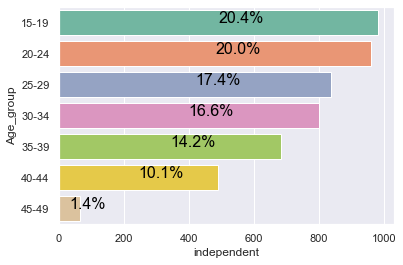

In [687]:
fin_Age_group=independence("Age_group")
fin_Age_group
fin_Age_group_percent = fin_Age_group/df.shape[0]
fin_Age_group_percent.rename(columns={"independent":"independent_percent"},inplace=True)
fin_Age_group_result= pd.concat([fin_Age_group,fin_Age_group_percent], axis=1)
fin_Age_group_result["independent"]=fin_Age_group_result["independent"].sort_values(ascending=False).to_list()
fin_Age_group_result.reset_index(level=0, inplace=True)
display(fin_Age_group_result)
ax = sns.barplot(data=fin_Age_group_result,x="independent",y="Age_group",ci=False,palette="Set2")
total = sum(fin_Age_group_result['independent'])

for p in ax.patches:
    
       
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

crosstab2 = pd.crosstab(df["Financial_Independance"], df["Age_group"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Financial_Independance,marital status,independent,independent_percent
0,Married,4060,0.843198
1,cohabitation,755,0.156802


stat=7343.853, p=0.000
Probably dependent


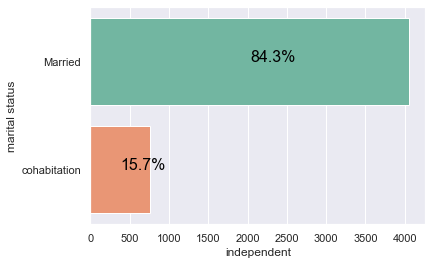

In [688]:
fin_status=independence("marital status")
fin_status_percent = fin_status/df1.shape[0]
fin_status_percent.rename(columns={"independent":"independent_percent"},inplace=True)
fin_status_result= pd.concat([fin_status,fin_status_percent], axis=1)
fin_status_result["independent"]=fin_status_result["independent"].sort_values(ascending=False).to_list()
fin_status_result.reset_index(level=0, inplace=True)
display(fin_status_result)
ax = sns.barplot(data=fin_status_result,x="independent",y="marital status",ci=False,palette="Set2")
total = sum(fin_status_result['independent'])

for p in ax.patches:
        
       
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

crosstab3 = pd.crosstab(df["Financial_Independance"], df["marital status"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Financial_Independance,Religion,independent,independent_percent
0,Catholic,2370,0.425753
1,No religion,2050,0.064382
2,Protestant,310,0.492212
3,Vaudousant,85,0.017653


stat=75.865, p=0.000
Probably dependent


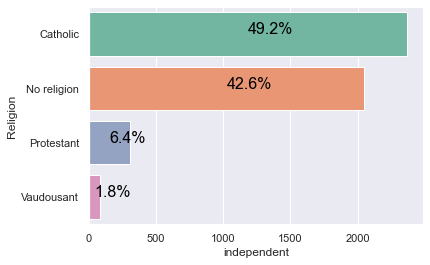

In [689]:
fin_religion= independence("Religion")
fin_religion.rename(columns={0:"Not independent",1:"independent"},inplace=True)
fin_religion["independent"] = fin_religion["independent"].sort_values(ascending=False)
fin_religion_percent = fin_religion/df1.shape[0]
fin_religion_percent.rename(columns={"independent":"independent_percent"},inplace=True)
fin_religion_result= pd.concat([fin_religion,fin_religion_percent], axis=1)
fin_religion_result["independent"]=fin_religion_result["independent"].sort_values(ascending=False).to_list()
fin_religion_result.reset_index(level=0, inplace=True)
display(fin_religion_result)

ax = sns.barplot(data=fin_religion_result,x="independent",y="Religion",ci=False,palette="Set2")
total = sum(fin_religion_result['independent'])

for p in ax.patches:
        
       
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

crosstab4 = pd.crosstab(df["Financial_Independance"], df["Religion"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Financial_Independance,Highest educational level,independent,independent_percent
0,Higher,1841,0.041745
1,No education,1677,0.227622
2,Primary,1096,0.382347
3,Secondary,201,0.348287


stat=361.544, p=0.000
Probably dependent


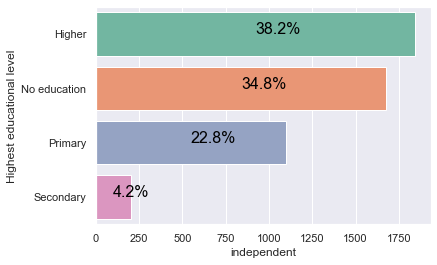

In [690]:
fin_religion= independence("Highest educational level")
fin_religion.rename(columns={0:"Not independent",1:"independent"},inplace=True)
fin_religion["independent"] = fin_religion["independent"].sort_values(ascending=False)
fin_religion_percent = fin_religion/df1.shape[0]
fin_religion_percent.rename(columns={"independent":"independent_percent"},inplace=True)
fin_religion_result= pd.concat([fin_religion,fin_religion_percent], axis=1)
fin_religion_result["independent"]=fin_religion_result["independent"].sort_values(ascending=False).to_list()
fin_religion_result.reset_index(level=0, inplace=True)
display(fin_religion_result)

ax = sns.barplot(data=fin_religion_result,x="independent",y="Highest educational level",ci=False,palette="Set2")
total = sum(fin_religion_result['independent'])

for p in ax.patches:
        
       
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

crosstab5 = pd.crosstab(df["Financial_Independance"], df["Highest educational level"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab5)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

In [691]:
a=df.Age.mean()
print(df[df["Financial_Independance"]=="1"].value_counts())
#.Age.mean())
# print(df[df["currently_working"]=="Yes"].Age.mean())
# print(df[df["Bank_Account"]=="Yes"].Age.mean())
a

Series([], dtype: int64)


30.576871011409786

In [692]:
# def Churn_category(x):
#     churn_category = pd.DataFrame(df.groupby(x)[['Financial_Independance']])
#     #churn_category.reset_index(level=0, inplace=True)
#     ax1 = plt.figure(figsize=(6,4))
#     plt.bar(churn_category.index, churn_category['Financial_Independance'] ,color = ['coral','brown','red'], edgecolor="black", )
#     plt.title('Distribution of churn by '+ x,size=12)
#     for i in range(len(churn_category['Financial_Independance'])):
#             plt.text(i,0.1, str(round(churn_category['Financial_Independance'].values[i]*100,2))+"%", fontsize =14, horizontalalignment='center', verticalalignment='center', )
#     return churn_category

In [693]:
# def table_bar(secteur=''):
#     commune=df[df['secteur activite']==secteur].pivot_table(index='Religion', columns='Financial_Independence', values='Case Identification', aggfunc='count')
#     commune=commune.sort_values(by=secteur, ascending=False)
#     ax = commune.plot(kind='barh')
#     for container in ax.containers:
#         ax.bar_label(container)
#     return commune

In [694]:
# total = len(fin_departement_result['independent'])*1.
# def without_hue(plot, feature):
#     total = len(feature)
#     for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#         x = p.get_x() + p.get_width() / 2 - 0.05
#         y = p.get_y() + p.get_height()
#         ax.annotate(percentage, (x, y), size = 12)
#     plt.show()

Financial_Independance,Departement,independent,independent_percent
0,Artibonite,1136,0.129803
1,Centre,625,0.078712
2,Grand'Anse,503,0.068744
3,Nippes,445,0.066044
4,Nord,381,0.092420
5,Nord-Est,379,0.079128
6,Nord-Ouest,355,0.104465
7,Ouest,342,0.235929
8,Sud,331,0.073728
9,Sud-Est,318,0.071028


stat=19.011, p=0.025
Probably dependent


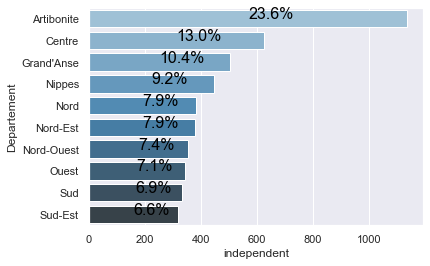

In [695]:
fin_departement =independence("Departement") 
fin_departement.sort_values(by="Departement",ascending=True)
fin_departement_percent = fin_departement/df1.shape[0]
fin_departement_percent.rename(columns={"independent":"independent_percent"},inplace=True)
fin_departement_result= pd.concat([fin_departement,fin_departement_percent], axis=1)
fin_departement_result
fin_departement_result["independent"]=fin_departement_result["independent"].sort_values(ascending=False).to_list()
fin_departement_result.reset_index(level=0, inplace=True)
display(fin_departement_result)
ax = sns.barplot(data=fin_departement_result,x="independent",y="Departement",ci=False,palette="Blues_d")
total = sum(fin_departement_result['independent'])

for p in ax.patches:
       
       
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")


crosstab6 = pd.crosstab(df["Financial_Independance"], df["Departement"])        
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab6)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

In [696]:
df.drop(["Score","score1","Respondent_occupation","Spend earnings","currently_working","Residence_place","Case Identification","Respondent year of birth","Age_group","Bank_Account","Education in single years"],axis=1,inplace=True)

In [697]:
df["Departement"]=df["Departement"].apply(lambda x: str(x).replace("Grand'Anse","Grand_anse"))

In [698]:
# labels=df.pop("Financial_Independance")

In [699]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(df,labels,test_size=0.25)

In [700]:
# from sklearn.ensemble import RandomForestClassifier
# rf= RandomForestClassifier()
# rf.fit(x_train,y_train)

In [701]:
# y_pred=rf.predict(x_test)

In [702]:
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test,y_pred)
# roc_auc= auc(false_positive_rate, true_positive_rate)

In [703]:
# n_estimators=[1,2,4,8,16,32,64,100,200]
# train_results =[]
# test_results=[]
# for estimator in n_estimators:
#     rf= RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
#     rf.fit(x_train,y_train)
#     train_pred=rf.predict(x_train)
#     false_positive_rate,true_positive_rate,thresholds= roc_curve(y_train,train_pred)
#     roc_auc=auc(false_positive_rate,true_positive_rate)
#     train_results.append(roc_auc)
#     y_pred=rf.predict(x_test)
#     false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
#     roc_auc=auc(false_positive_rate,true_positive_rate)
#     test_results.append(roc_auc)

# from matplotlib.legend_handler import HandlerLine2D
# line1, =plt.plot(n_estimators,train_results,"b",label="Train AUC")
# line2,= plt.plot(n_estimators, test_results,'r',label="Test AUC")
# plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
# plt.ylabel("AUC score")
# plt.xlabel("n_estimators")
# plt.show

In [704]:
df=pd.get_dummies(df, columns=['Departement','Highest educational level','Religion','marital status'])
df

,Age,children_number,Financial_Independance,Departement_Artibonite,Departement_Centre,Departement_Grand_anse,Departement_Nippes,Departement_Nord,Departement_Nord-Est,Departement_Nord-Ouest,...,Religion_Other,Religion_Protestant,Religion_Vaudousant,marital status_Divorced,marital status_Married,marital status_Never in union,marital status_Widowed,marital status_cohabitation,marital status_nan,marital status_separated
0,18,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,33,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,58,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
15509,26,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
15510,34,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
15511,34,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## Random Forest

In [705]:
Y=df["Financial_Independance"]
Y

0        0
1        0
2        0
3        1
4        0
        ..
15508    0
15509    0
15510    0
15511    0
15512    0
Name: Financial_Independance, Length: 15513, dtype: int64

In [706]:
X=df.drop(labels=["Financial_Independance"],axis=1)

In [707]:
from sklearn.model_selection import train_test_split

In [708]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=20)
print(X_train)

       Age  children_number  Departement_Artibonite  Departement_Centre  \
11302   28                0                       0                   0   
13318   61                0                       0                   0   
9176    20                0                       0                   0   
846     47                9                       0                   0   
2645    37                3                       0                   0   
...    ...              ...                     ...                 ...   
14729   28                1                       0                   1   
7068    20                0                       0                   0   
7391    17                0                       0                   1   
4367    22                4                       0                   1   
10714   22                0                       0                   0   

       Departement_Grand_anse  Departement_Nippes  Departement_Nord  \
11302                       

In [709]:
from sklearn.ensemble import RandomForestClassifier

In [710]:
model=RandomForestClassifier(n_estimators=10,random_state=30)

In [711]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

In [712]:
prediction_test=model.predict(X_test)
print(prediction_test)

[0 0 0 ... 0 0 0]


In [713]:
from sklearn import metrics

In [714]:
print("Accuracy=",metrics.accuracy_score(Y_test, prediction_test))
#plot_confusion_matrix(model,X_test,Y_test)

Accuracy= 0.7921366419593941


In [715]:
feature_list=list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Age                                       0.315534
children_number                           0.245851
marital status_Married                    0.139953
marital status_Never in union             0.068142
marital status_cohabitation               0.040342
marital status_separated                  0.034363
marital status_nan                        0.021192
Highest educational level_Primary         0.009823
Highest educational level_Secondary       0.009653
Highest educational level_No education    0.009645
Departement_Ouest                         0.009313
Departement_Artibonite                    0.009093
Departement_Nord                          0.008537
Religion_Catholic                         0.008155
Departement_Centre                        0.007929
Religion_Protestant                       0.007500
Departement_Nord-Ouest                    0.007426
Departement_Nippes                        0.007274
Departement_Grand_anse                    0.006566
Departement_Sud                

## Logistic Regression

In [716]:
lr  = LogisticRegression()

In [717]:
print(lr.fit(X_train,Y_train))

LogisticRegression()


C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [718]:
lr.score(X_test,Y_test)

0.8327425072510474

In [719]:
y_pred = lr.predict(X_test)"YlOrRd", 10

SyntaxError: invalid syntax (<ipython-input-719-c0c3c6d6b95a>, line 1)

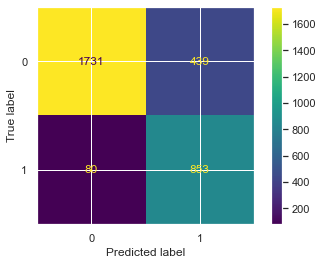

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,Y_test) 
plt.set_cmap("YlOrRd")

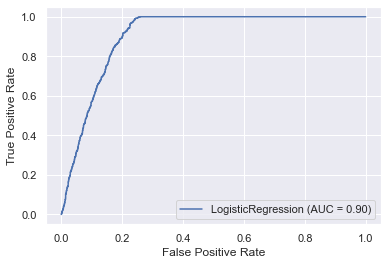

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,Y_test)

C:\Users\bootcamp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


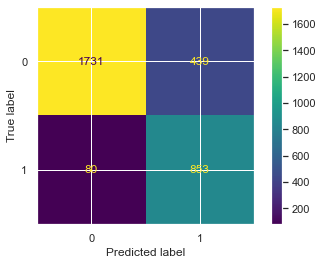

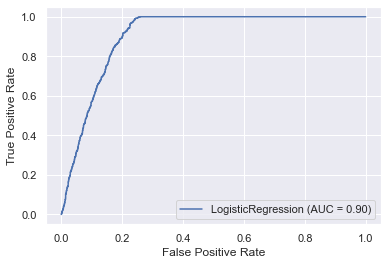

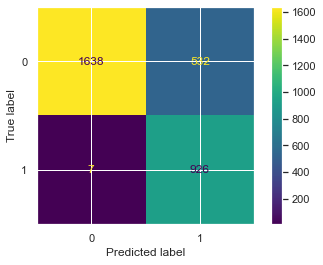

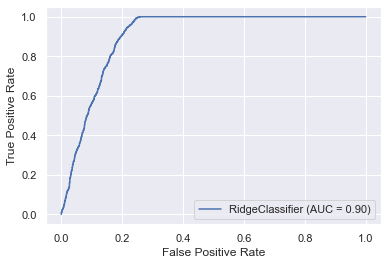

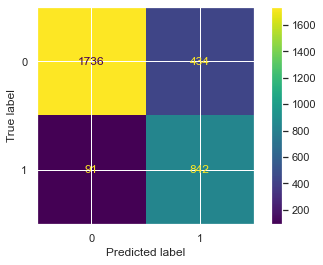

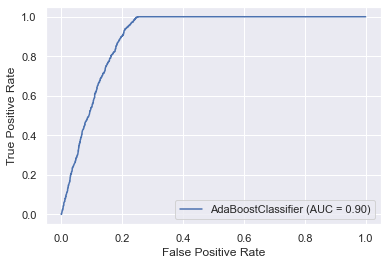

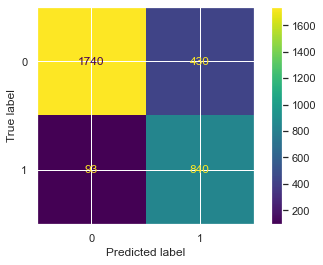

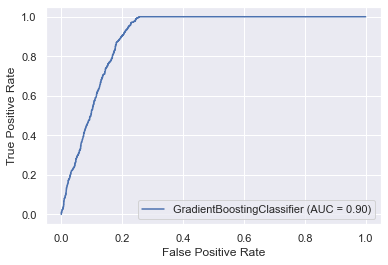

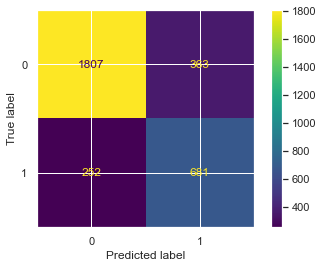

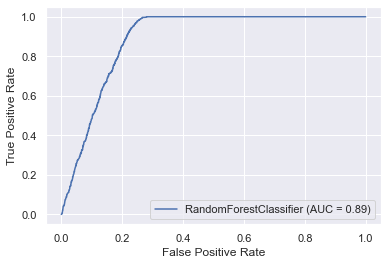

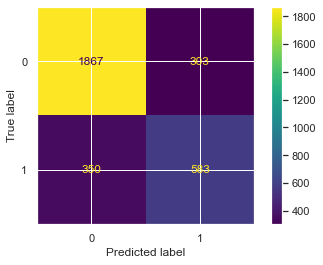

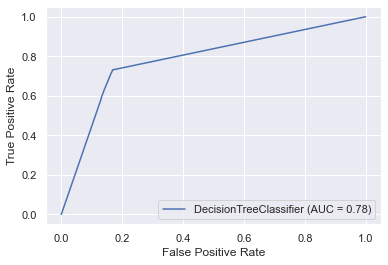

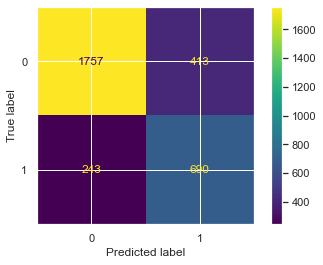

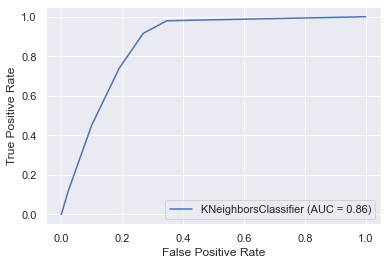

In [ ]:
import time 
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,Y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,Y_test))
  plot_confusion_matrix(model,X_test,Y_test)
  plot_roc_curve(model,X_test,Y_test)

df2=pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [ ]:
df2

,names,scores,times
0,LogisticRegression,0.832743,0.092750
1,RidgeClassifier,0.826297,0.414927
2,AdaBoostClassifier,0.830809,0.380253
3,GradientBoostingClassifier,0.831453,0.792817
4,RandomForestClassifier,0.801805,0.602292
5,DecisionTreeClassifier,0.789558,0.020067
6,KNeighborsClassifier,0.788592,0.137937


# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?